https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

In [1]:
##pip install xgboost

**I. Introduction**

This report will showcase my data science skills by analysing data from Kaggle published recently where a bank manager is disturbed by the trend where more customers leaving their credit card services. They want to know how they can predict this in the future so they can proactively approach customers to prevent them from leaving. 

This is a classic business issue that happens in all industries and I will explore the customer behaviour to get more insights as well as applying the predictive modelling.



**II. Dataset and Features**

The dataset is not large with 10,127 rows and 24 columns. There are 23 features consisting of 6 objects and the remaining are either integer or float. It is a clean dataset with no null values encountered. 

From the information given, we also know the attrition rate is 16% in the dataset. This presents a problem with imbalance data to do accurate predictive modelling. I will consider this issue later when applying the predictive modelling.

Some column descriptions are self-explanatory and the rest can be seen below :  

- Attrition_Flag : this is flagging if a customer leaving 
- Card_Category  : this is the different card products offered to customers
 


In [150]:
import pandas as pd
import seaborn as sns


dataset = pd.read_csv('BankChurners.csv')
dataset = dataset.drop([ 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)


2


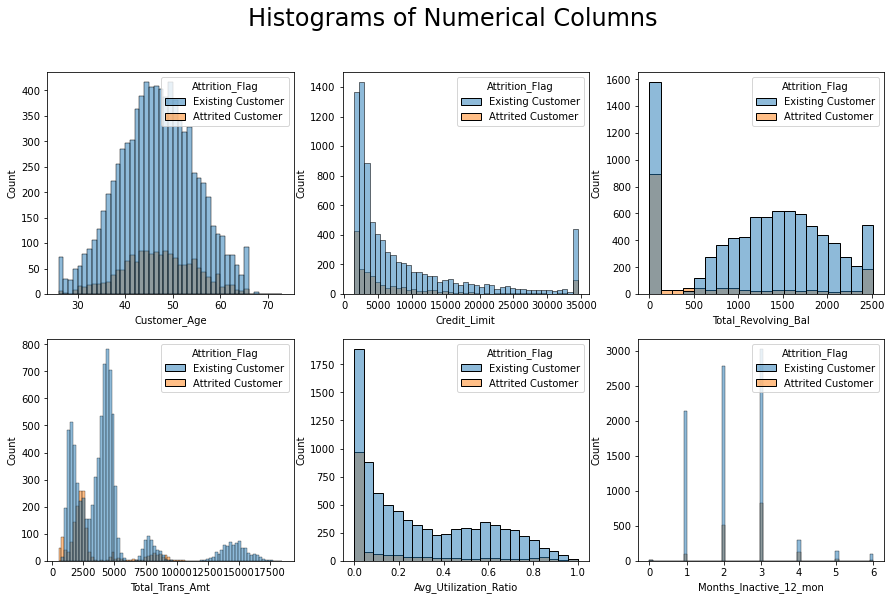

In [32]:
columns = ['Customer_Age', 'Credit_Limit' ,'Total_Revolving_Bal'
           ,'Total_Trans_Amt','Avg_Utilization_Ratio','Months_Inactive_12_mon'
          ]

#columns = ['Customer_Age', 'Credit_Limit' ,'Total_Revolving_Bal'
#           ,'Total_Trans_Amt','Avg_Utilization_Ratio','Months_on_book'
#           ,'Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon'
#          ]


norow = int(round(len(columns)/3,0))
print (norow)

fiq, ax = plt.subplots(norow, 3, figsize=(15,9))


plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")

for i,d in enumerate(columns):
     #print (i,d)
     if i < 3:
         chart = sns.histplot(x=dataset.loc[:,d], data=dataset, ax=ax[0,i], hue='Attrition_Flag')
     else:
         chart = sns.histplot(x=dataset.loc[:,d], data=dataset, ax=ax[1,i-6], hue='Attrition_Flag')   
        
        #chart.set(title='Tips Bar Plot Default (Avg)')

**Exploratory Data Analysis Numerical Columns**

Further exploration from numerical columns showing some insights on the relationship between attrition flag and other features.

- Customer age does not show any intriquing behavious as both histograms are in line in terms of distribution.
- The credit limit, however, shows attrition tends to occur to those customers with credit limit less 10,000.
- Customers with zero revolving balance also have high attrition as well as customers with 2500 revolving balance. 
- There is no attrition for customers with total transaction amounts greater than 12,500.
- Attrition is high for those customers with zero utilisation ratio
- Attrition is also high when customers have been inactive for 2 and 3 months


    
From the above observations, we can see some interesting patterns and make some assumptions why they have more customers leaving the bank. Those customers seem to have not used their cards for more than 2 months and they make up the numbers in zero utilisation ratio as well as zero revolving balance. 



There are still more questions to ask based on the facts we see above such as :

- Those customers who left, have they been long with the bank and how many products do they have?
- Have we made enough contacts with them to retain them?
- Do they response well with the column average open to buy?
- Is there specific cohort based on age, dependent?



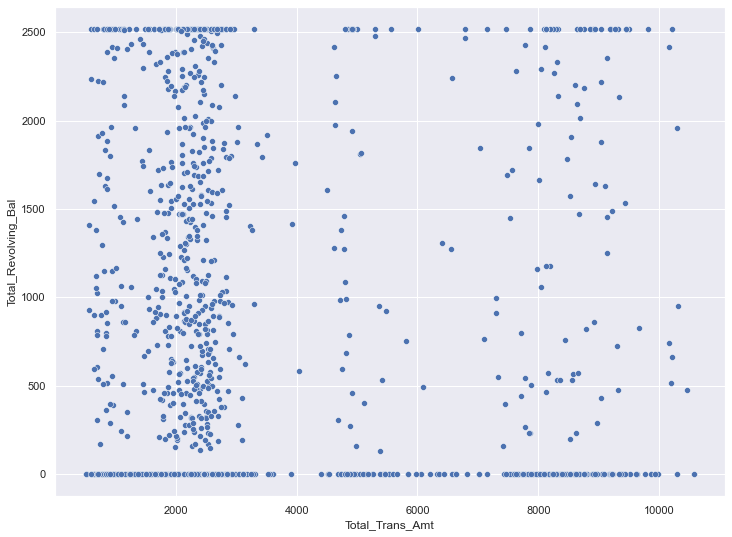

In [267]:

plt.subplots(figsize=(12,9))
sns.scatterplot(y='Total_Revolving_Bal',x='Total_Trans_Amt',data=att_cust)
plt.show()

From the above, we can see a cluster of customers who made less than 4000k transactions and they have revolving balances in their account. That means these customers have defaulted and left the bank. Do we really need to retain them if they can't pay their balances?

Maybe need to split between those with zero revolving balance and those without zero revolving balance. 

After that, doe pie chart


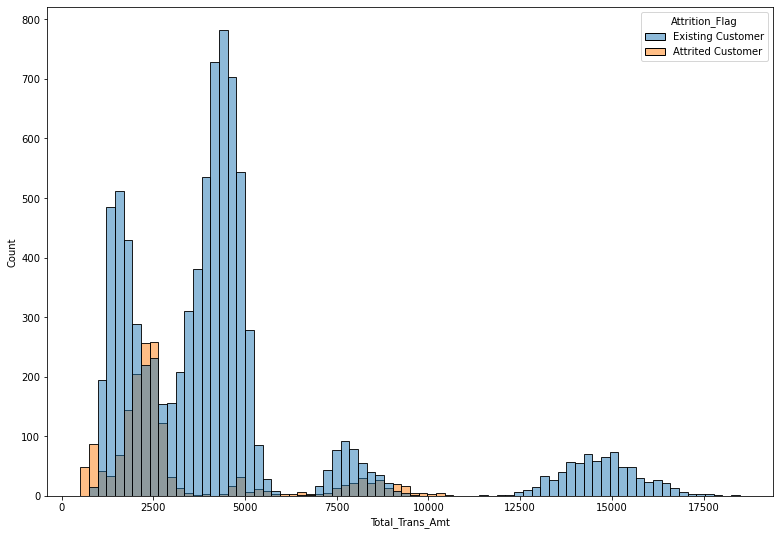

In [12]:
plt.subplots(figsize=(13,9))
sns.histplot(x=dataset['Total_Trans_Amt'], data=dataset, hue='Attrition_Flag')

In [181]:

# step 1 split the tables
att_cust = dataset[dataset['Attrition_Flag']=='Attrited Customer']
reg_cust = dataset[dataset['Attrition_Flag']!='Attrited Customer']



a = att_cust.describe()
a =a.loc['mean',
        ['Customer_Age','Months_on_book','Total_Relationship_Count'
         ,'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Avg_Open_To_Buy'
        ,'Dependent_count']]


b = reg_cust.describe()
b =b.loc['mean',
        ['Customer_Age','Months_on_book','Total_Relationship_Count'
         ,'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Avg_Open_To_Buy'
        ,'Dependent_count']]

frame = { 'Attrited Customer': a, 'Existing Customer': b } 
  
result = pd.DataFrame(frame) 
result


,Attrited Customer,Existing Customer
Customer_Age,46.659496,46.262118
Months_on_book,36.178242,35.880588
Total_Relationship_Count,3.279656,3.914588
Months_Inactive_12_mon,2.693301,2.273765
Contacts_Count_12_mon,2.972342,2.356353
Credit_Limit,8136.039459,8726.877518
Avg_Open_To_Buy,7463.216472,7470.273400
Dependent_count,2.402581,2.335412


The statistic above shows the average for different features between existing customers and attrited customers. 
We can asnwer some of the previous questions :

- On average, the attrited customers have been with the bank about 36 months and in line with existing ones
- We actually make similar contacts with these customers compared to existing ones 
- They are also open to similar new credit limit 
- And of average, they also have similar dependent so there is no specific cohort on attrition.

As per previous assumption, we do know these customers have been inactive for quite a while before they close their cards. Another interesting fact from the above comparison, the existing customers also have average around 2.3 months inactivity. This is quite concerning which means there are potentially some existing customers that might follow to leave the bank.


**Exploratory Data Analysis Categorical Columns**

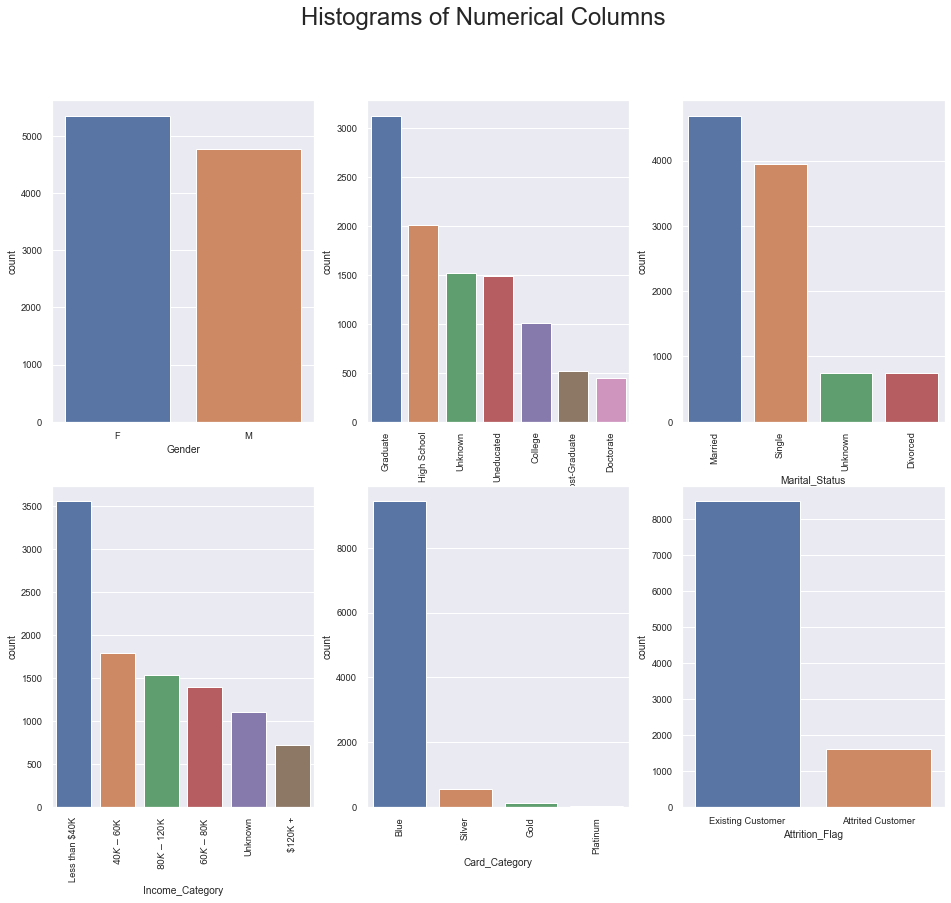

In [210]:
columns = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category','Attrition_Flag']


norow = int(round(len(columns)/3,0))

fiq, ax = plt.subplots(norow, 3, figsize=(16,13))


plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")

for i,d in enumerate(columns):
     #print (i,d)
     if i < 3:
         chart = sns.countplot(x=dataset.loc[:,d], data=dataset, order = dataset.loc[:,d].value_counts().index, ax=ax[0,i])
         sns.set(font_scale = 1)
         if dataset.loc[:,d].nunique() > 3: 
             chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  

     else:
         chart = sns.countplot(x=dataset.loc[:,d], data=dataset, order = dataset.loc[:,d].value_counts().index, ax=ax[1,i-6])
         sns.set(font_scale = 1) 
         if dataset.loc[:,d].nunique() > 3: 
             chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
            
        
        #chart.set(title='Tips Bar Plot Default (Avg)')

# Exploratory Data Analysis Categorical Columns

We can see further information about the customers from the categorical columns.
- Based on gender, we have almost equal split between males and females
- Based on education, we can also see we have significant customers with graduate degrees
- Marital status is also closely split between single and married
- Another interest fact, we have significant customers with salary less than $40k
- We have 4 product categories but majority of customers signed up with Blue
- The actual customer that moved out is 1627 customers out 8500 existing customers (16%)
    
We are going to look at further the profiles of the attrited customers vs existing customers to see the compositions are different. 



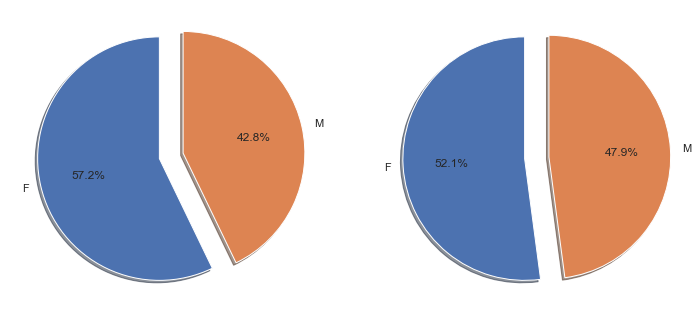

In [230]:

import matplotlib.pyplot as plt


#att_cust = dataset[dataset['Attrition_Flag']=='Attrited Customer']
#reg_cust = dataset[dataset['Attrition_Flag']!='Attrited Customer']


# step1 create the canvas (2 columns)
fiq, ax = plt.subplots(1, 2, figsize=(12,9))

#plt.suptitle('Gender Comparison')

#### create pctg table 1 and plot to ax 1####
a = att_cust[['Gender','Customer_Age']].groupby('Gender',as_index=False).count()
total = att_cust['Gender'].count()
a['Total'] = total
a['Pctg'] = a['Customer_Age']/a['Total']
sizes = a['Pctg']
labels = a['Gender']
ax[0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)


#### create pctg table 2 and plot to ax 2####
a = reg_cust[['Gender','Customer_Age']].groupby('Gender',as_index=False).count()
total = reg_cust['Gender'].count()
a['Total'] = total
a['Pctg'] = a['Customer_Age']/a['Total']
sizes = a['Pctg']
labels = a['Gender']
ax[1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)


plt.show()

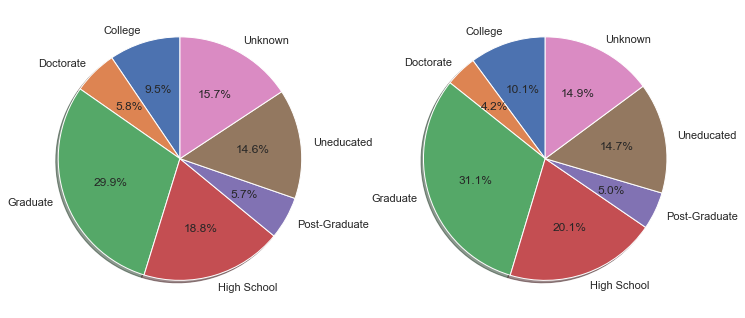

In [247]:
import matplotlib.pyplot as plt


#att_cust = dataset[dataset['Attrition_Flag']=='Attrited Customer']
#reg_cust = dataset[dataset['Attrition_Flag']!='Attrited Customer']


# step1 create the canvas (2 columns)
fiq, ax = plt.subplots(1, 2, figsize=(12,9))

#plt.suptitle('Gender Comparison')

#### create pctg table 1 and plot to ax 1####
a = att_cust[['Education_Level','Customer_Age']].groupby('Education_Level',as_index=False).count()
total = att_cust['Education_Level'].count()
a['Total'] = total
a['Pctg'] = a['Customer_Age']/a['Total']
sizes = a['Pctg']
labels = a['Education_Level']
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

#### create pctg table 1 and plot to ax 1####
a = reg_cust[['Education_Level','Customer_Age']].groupby('Education_Level',as_index=False).count()
total = reg_cust['Education_Level'].count()
a['Total'] = total
a['Pctg'] = a['Customer_Age']/a['Total']
sizes = a['Pctg']
labels = a['Education_Level']
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)


plt.show()

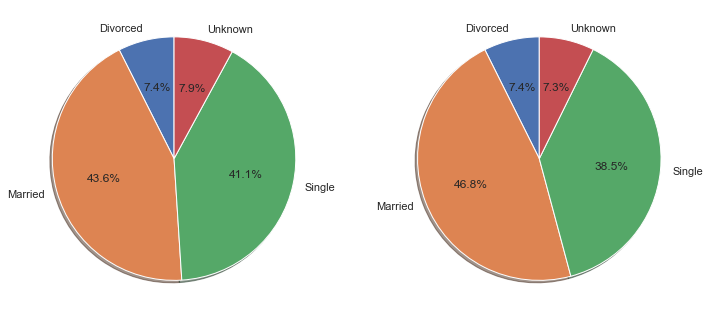

In [250]:
import matplotlib.pyplot as plt


#att_cust = dataset[dataset['Attrition_Flag']=='Attrited Customer']
#reg_cust = dataset[dataset['Attrition_Flag']!='Attrited Customer']


# step1 create the canvas (2 columns)
fiq, ax = plt.subplots(1, 2, figsize=(12,9))

#plt.suptitle('Gender Comparison')

#### create pctg table 1 and plot to ax 1####
a = att_cust[['Marital_Status','Customer_Age']].groupby('Marital_Status',as_index=False).count()
total = att_cust['Marital_Status'].count()
a['Total'] = total
a['Pctg'] = a['Customer_Age']/a['Total']
sizes = a['Pctg']
labels = a['Marital_Status']
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

#### create pctg table 1 and plot to ax 1####
a = reg_cust[['Marital_Status','Customer_Age']].groupby('Marital_Status',as_index=False).count()
total = reg_cust['Marital_Status'].count()
a['Total'] = total
a['Pctg'] = a['Customer_Age']/a['Total']
sizes = a['Pctg']
labels = a['Marital_Status']
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)


plt.show()

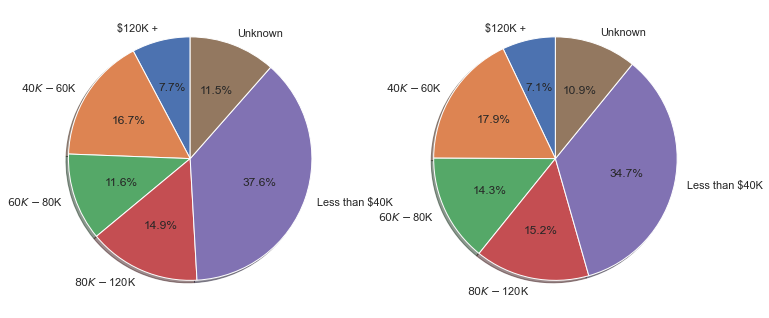

In [252]:
import matplotlib.pyplot as plt


#att_cust = dataset[dataset['Attrition_Flag']=='Attrited Customer']
#reg_cust = dataset[dataset['Attrition_Flag']!='Attrited Customer']


# step1 create the canvas (2 columns)
fiq, ax = plt.subplots(1, 2, figsize=(12,9))

#plt.suptitle('Gender Comparison')

#### create pctg table 1 and plot to ax 1####
a = att_cust[['Income_Category','Customer_Age']].groupby('Income_Category',as_index=False).count()
total = att_cust['Income_Category'].count()
a['Total'] = total
a['Pctg'] = a['Customer_Age']/a['Total']
sizes = a['Pctg']
labels = a['Income_Category']
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)


#### create pctg table 1 and plot to ax 1####
a = reg_cust[['Income_Category','Customer_Age']].groupby('Income_Category',as_index=False).count()
total = reg_cust['Income_Category'].count()
a['Total'] = total
a['Pctg'] = a['Customer_Age']/a['Total']
sizes = a['Pctg']
labels = a['Income_Category']
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)


plt.show()

**Finding from pie charts**

- Female composition is higher by 5 per cent in attritied customers
- You see some percentage increases in doctorate and postgraduate whilst uneducated remains the same
- Another interesting fact is the percentage of single people goes up by 2.5%
- And we also know the bulk of this attrition falls under income category below 40k and percentage increase is about 3 pct. 



In [ ]:
import matplotlib.pyplot as plt



# step1 create the canvas (2 columns)
fiq, ax = plt.subplots(1, 2, figsize=(12,9))

#plt.suptitle('Gender Comparison')

#### create pctg table 1 and plot to ax 1####
a = att_cust[['Gender','Customer_Age']].groupby('Gender',as_index=False).count()
total = att_cust['Gender'].count()
a['Total'] = total
a['Pctg'] = a['Customer_Age']/a['Total']
sizes = a['Pctg']
labels = a['Gender']
ax[0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)


#### create pctg table 2 and plot to ax 2####
a = reg_cust[['Gender','Customer_Age']].groupby('Gender',as_index=False).count()
total = reg_cust['Gender'].count()
a['Total'] = total
a['Pctg'] = a['Customer_Age']/a['Total']
sizes = a['Pctg']
labels = a['Gender']
ax[1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)


plt.show()

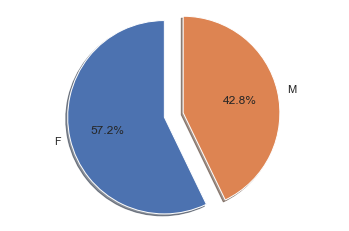

In [234]:
import matplotlib.pyplot as plt


#att_cust = dataset[dataset['Attrition_Flag']=='Attrited Customer']
#reg_cust = dataset[dataset['Attrition_Flag']!='Attrited Customer']



#### create pctg table ####
a = att_cust[['Gender','Customer_Age']].groupby('Gender',as_index=False).count()
total = att_cust['Gender'].count()
a['Total'] = total
a['Pctg'] = a['Customer_Age']/a['Total']


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = a['Gender']
sizes = a['Pctg']
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# just use pie chart to do further analysis to compare attrition vs retaining customers


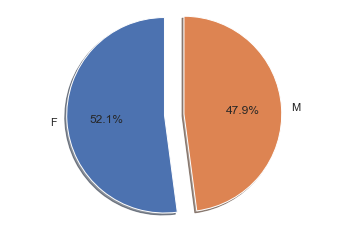

In [216]:
import matplotlib.pyplot as plt


#att_cust = dataset[dataset['Attrition_Flag']=='Attrited Customer']
#reg_cust = dataset[dataset['Attrition_Flag']!='Attrited Customer']



#### create pctg table ####
a = reg_cust[['Gender','Customer_Age']].groupby('Gender',as_index=False).count()
total = reg_cust['Gender'].count()
a['Total'] = total
a['Pctg'] = a['Customer_Age']/a['Total']


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = a['Gender']
sizes = a['Pctg']
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# just use pie chart to do further analysis to compare attrition vs retaining customers


Attrition occurs in those customers with total transactions less than $12.5k with customers spending more than than remain with the bank.

We can observe as well that customers who have been inactive especially for 3 months have the most attrition rate. 
More needs to be done to follow up and monitor customer activity to prevent them from leaving. 

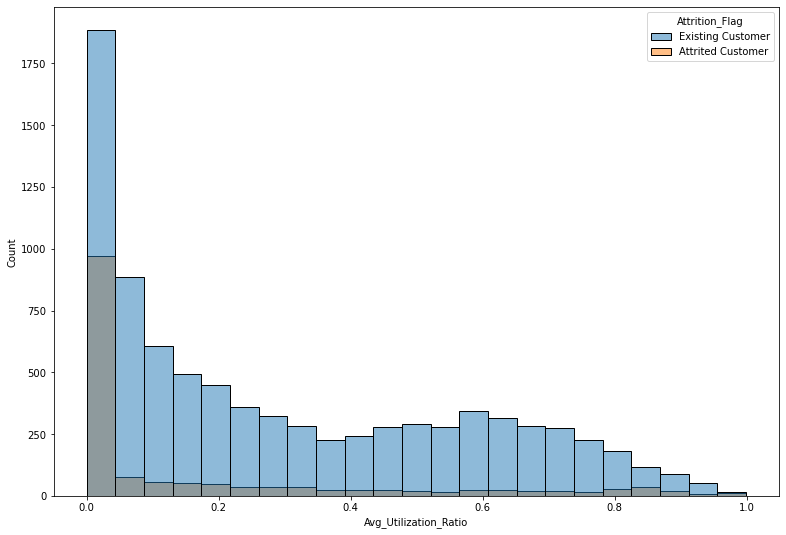

In [15]:
plt.subplots(figsize=(13,9))
sns.histplot(x=dataset['Avg_Utilization_Ratio'], data=dataset, hue='Attrition_Flag')

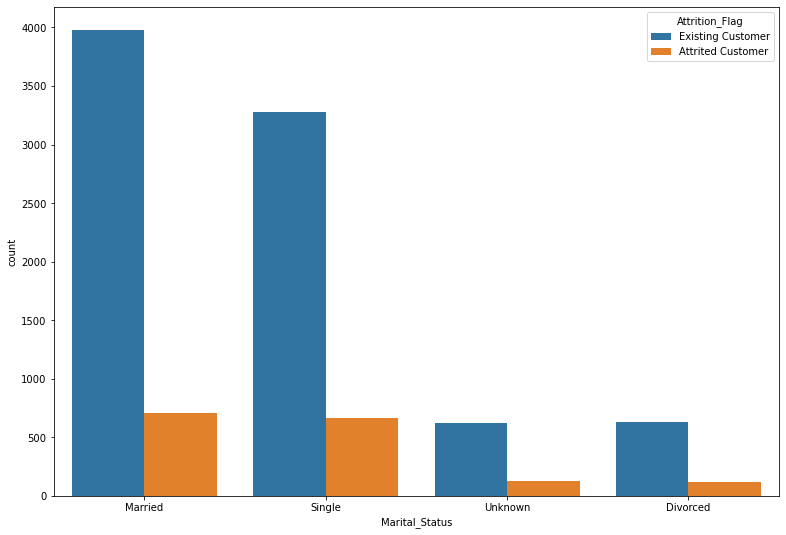

In [16]:

# looks like single people tend to have higher attrition

yourval = 'Marital_Status'
plt.subplots(figsize=(13,9))
sns.countplot(x=dataset[yourval], data=dataset, hue='Attrition_Flag',order = dataset[yourval].value_counts().index)

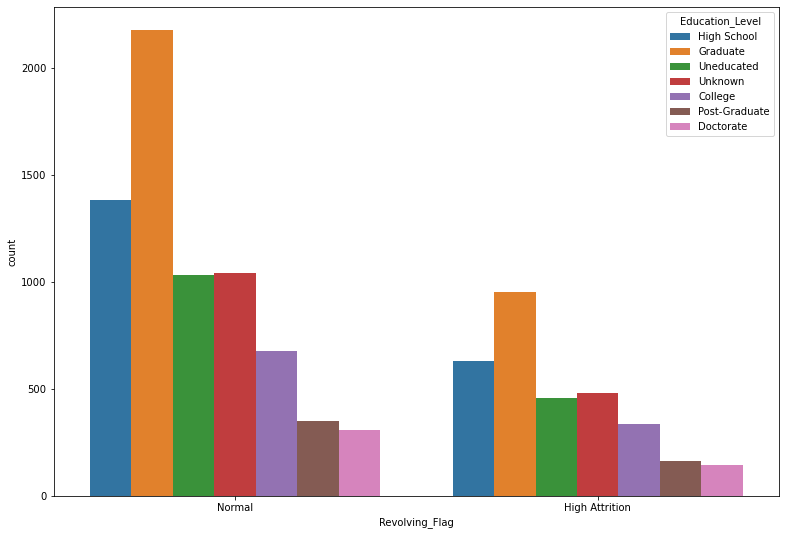

In [17]:
yourval = 'Revolving_Flag'
plt.subplots(figsize=(13,9))
sns.countplot(x=dataset[yourval], data=dataset, hue='Education_Level',order = dataset[yourval].value_counts().index)

In [18]:
dataset.groupby('Revolving_Flag')['Education_Level'].value_counts(normalize=True)

Revolving_Flag  Education_Level
High Attrition  Graduate           0.300759
                High School        0.199241
                Unknown            0.151486
                Uneducated         0.144213
                College            0.106262
                Post-Graduate      0.052182
                Doctorate          0.045857
Normal          Graduate           0.312563
                High School        0.198564
                Unknown            0.149318
                Uneducated         0.148026
                College            0.097200
                Post-Graduate      0.050395
                Doctorate          0.043934
Name: Education_Level, dtype: float64

In [19]:
dataset.groupby('Revolving_Flag')['Marital_Status'].value_counts(normalize=True)

Revolving_Flag  Marital_Status
High Attrition  Married           0.444023
                Single            0.402277
                Unknown           0.077799
                Divorced          0.075901
Normal          Married           0.471357
                Single            0.383489
                Divorced          0.072936
                Unknown           0.072218
Name: Marital_Status, dtype: float64

In [20]:
dataset.groupby('Revolving_Flag')['Income_Category'].value_counts(normalize=True)

Revolving_Flag  Income_Category
High Attrition  Less than $40K     0.370019
                $40K - $60K        0.164769
                $80K - $120K       0.143896
                $60K - $80K        0.135674
                Unknown            0.117015
                $120K +            0.068627
Normal          Less than $40K     0.343288
                $40K - $60K        0.182197
                $80K - $120K       0.155061
                $60K - $80K        0.139698
                Unknown            0.106533
                $120K +            0.073223
Name: Income_Category, dtype: float64

In [21]:
dataset.groupby('Revolving_Flag')['Gender'].value_counts(normalize=True)

Revolving_Flag  Gender
High Attrition  F         0.556926
                M         0.443074
Normal          F         0.516439
                M         0.483561
Name: Gender, dtype: float64

Finding when splitting revolving flag by different categories :

 * Not much different by education level
 * Married people have higher attrition rate by ~3%
 * Female also tends to have higher attrition rate by ~4%

In [22]:
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object

SyntaxError: invalid syntax (<ipython-input-22-884435a2d984>, line 1)

In [78]:
att1.groupby(['Months_Inactive_12_mon'])['Contacts_Count_12_mon'].value_counts(normalize=True)

Months_Inactive_12_mon  Contacts_Count_12_mon
0                       3                        0.454545
                        4                        0.272727
                        2                        0.181818
                        6                        0.090909
1                       3                        0.462963
                        2                        0.259259
                        4                        0.203704
                        1                        0.037037
                        5                        0.037037
2                       3                        0.409091
                        2                        0.251748
                        4                        0.206294
                        1                        0.062937
                        5                        0.034965
                        6                        0.031469
                        0                        0.003497
3                       3 

In [ ]:
df_test.groupby(['A'])['B'].value_counts(normalize=True)

In [76]:
att1.groupby('Education_Level')

In [86]:
a

,Gender,Customer_Age,Total,Pctg
0,F,5358,10127,0.529081
1,M,4769,10127,0.470919


In [ ]:
dataset.dtypes

,Gender,Customer_Age,Total,Pctg
0,F,5358,10127,0.529081
1,M,4769,10127,0.470919


Attrition rate higher in those customers who harly use the card

In [ ]:
dataset.dtypes

In [ ]:
dataset['Months_on_book'].describe()


In [ ]:
df['Gender'].unique()

In [ ]:
df['Gender'].nunique()

In [ ]:
dataset["Attrition_Flag"].value_counts()

In [ ]:
dataset.dtypes


In [ ]:
dataset2 = dataset[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                   'Months_Inactive_12_mon']]
#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [ ]:
print (dataset.isna().any())

print (dataset.isna().sum())

In [ ]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique  values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

In [ ]:
dataset.info()

In [ ]:
df[['Customer_Age','Credit_Limit']].describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# create fig and subplots
fig, ax = plt.subplots(1,3,figsize=(20,8))
     
chart1 = sns.countplot(ax=ax[0],data=df,x='Dependent_count',order = df['Dependent_count'].value_counts().index)     
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)  

chart2 = sns.countplot(ax=ax[1],data=df,x='Education_Level',order = df['Education_Level'].value_counts().index)  
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)  

chart3 = sns.countplot(ax=ax[2],data=df,x='Marital_Status',order = df['Marital_Status'].value_counts().index)    
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=90)  


plt.show()

In [ ]:
# create fig and subplots
fig, ax = plt.subplots(1,3,figsize=(20,8))
     

sns.countplot(ax=ax[0],data=df,x='Dependent_count',hue='Attrition_Flag',order = df['Dependent_count'].value_counts().index)     
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)  

chart2 = sns.countplot(ax=ax[1],data=df,x='Education_Level',hue='Attrition_Flag',order = df['Education_Level'].value_counts().index)  
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)  

chart3 = sns.countplot(ax=ax[2],data=df,x='Marital_Status',hue='Attrition_Flag',order = df['Marital_Status'].value_counts().index)    
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=90)  

plt.show()

In [ ]:
chart2 = sns.countplot(data=df,x='Income_Category',hue = 'Attrition_Flag', order = df['Income_Category'].value_counts().index)  
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)  

plt.show()

In [ ]:
#penguins = sns.load_dataset("penguins")
plt.subplots(figsize=(20, 10))
sns.histplot(data=df, x="Credit_Limit",hue='Card_Category')

plt.show()

**What is the main issue?**

The main issue is to figure out what type of customers deciding to churn out and what type of products impacted by these customers. Based on this finding, we can determine if we have issues with our products offering and if we have to change our strategy.




**III. Prediction Machine Learning**

https://elitedatascience.com/imbalanced-classes

For the purpose of predictive modelling, we are going to use Random Forests which are widely used for classifiction problem like this one to determine if customers will leave the bank. 

The dataset will be split 70% for training and remaining 30% will be data without label to determine the accurancy of the model. 



In [133]:

import time


# Step 1 Convert object columns to category and converting them to numerical values

start = time.time()

df = dataset
other = df.select_dtypes(exclude=['category','int64','float64']).columns

# convert other to category
for i in other:
    df[i]=df[i].astype('category')

# pick up those category columns only and apply the cat codes (numeric)    
cat_columns = df.select_dtypes(include='category').columns
df[cat_columns]=df[cat_columns].apply(lambda x:x.cat.codes)



# Step 2 Split the dataset to train/test

from sklearn.model_selection import train_test_split

numeric_col = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count'
               ,'Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit'
               ,'Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct','Avg_Utilization_Ratio']

X = dataset[numeric_col]
y = dataset['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)



# Step 3 Apply Random Forest using some random variables (finetuning later)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(min_samples_split=5,n_estimators=100, random_state=20)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

duration = round(time.time() - start,2)

print ('It took {} seconds to process'.format(duration))


It took 0.81 seconds to process


Based on the random forrests , we can see the prediction has f1-score of about 91% where it predicts the outcome quite good. 

check below link for further explanation of macro and weighted
https://stackoverflow.com/questions/55740220/macro-vs-micro-vs-weighted-vs-samples-f1-score

In [134]:
from sklearn.metrics import classification_report

target_names = ['Attrited','Existing']   # remember the order is 0,1  hence the labelling follow that order

print(classification_report(y_test,prediction,target_names=target_names))

              precision    recall  f1-score   support

    Attrited       0.91      0.78      0.84       496
    Existing       0.96      0.98      0.97      2543

    accuracy                           0.95      3039
   macro avg       0.93      0.88      0.91      3039
weighted avg       0.95      0.95      0.95      3039



<Figure size 2016x1440 with 0 Axes>

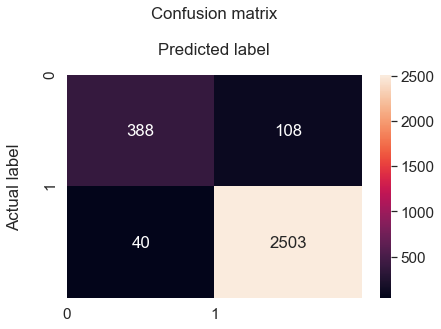

In [144]:
import numpy as np

cm = confusion_matrix(y_test, prediction) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

plt.show()

Now we are going to try if we can improve the results by fine-tuning the parameters we initially put in our random forest model. The fine-tuning will look at the best parameters for min samples split and the numbers of trees in the model. 

In [138]:
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_split':[5,10,15,20], 'n_estimators':[50, 100, 150]}


start = time.time()

tuning = GridSearchCV(model,parameters,cv=10)
tuning.fit(X_train,y_train)

duration = round(time.time() - start)

print ('It took {} seconds'.format(duration))



It took 79 seconds


In [140]:
best_accuracy = round(tuning.best_score_,2)
best_parameters = tuning.best_params_
best_accuracy, best_parameters

(0.96, {'min_samples_split': 10, 'n_estimators': 50})

Now, we are going to use the fine-tuned model to predict X_test and see if the accuracy will improve.

In [141]:
prediction2 =  tuning.predict(X_test)

from sklearn.metrics import classification_report

target_names = ['Attrited','Existing']   # remember the order is 0,1  hence the labelling follow that order

print(classification_report(y_test,prediction2,target_names=target_names))

              precision    recall  f1-score   support

    Attrited       0.89      0.77      0.82       496
    Existing       0.96      0.98      0.97      2543

    accuracy                           0.95      3039
   macro avg       0.92      0.87      0.90      3039
weighted avg       0.94      0.95      0.94      3039



In [142]:
from sklearn.metrics import balanced_accuracy_score
display (round(balanced_accuracy_score(y_test,prediction),2))
display (round(balanced_accuracy_score(prediction,y_test),2))

0.88

0.93

Text(0.5, 8.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

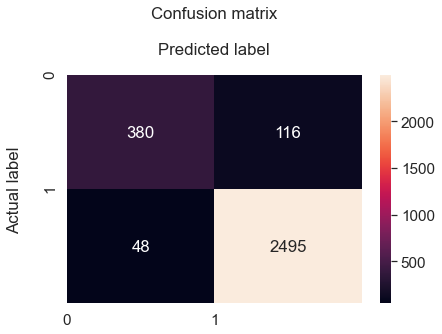

In [145]:
import numpy as np

cm = confusion_matrix(y_test, prediction2) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [74]:
from sklearn.metrics import balanced_accuracy_score
display (round(balanced_accuracy_score(y_test,prediction),2))
display (round(balanced_accuracy_score(prediction,y_test),2))

0.88

0.93

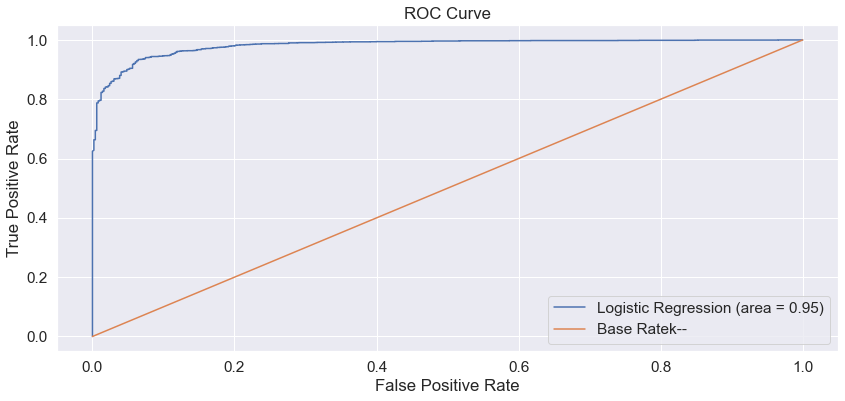

In [123]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
model.fit(X_train, y_train) 
probs = model.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, prediction )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


# plot the figures
plt.figure(figsize=(14, 6))

plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()